<a href="https://colab.research.google.com/github/HKishanPatel/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title : Online Retail Customer Segmentation**

---


#**Problem Description**

**In this project, the goal is to classify the major groups of customers in a dataset that includes all transactions made between December 1st, 2010 and September 12th, 2011 by a UK-based online retail company that specializes in unique gifts for all occasions. This company typically sells to wholesalers.**

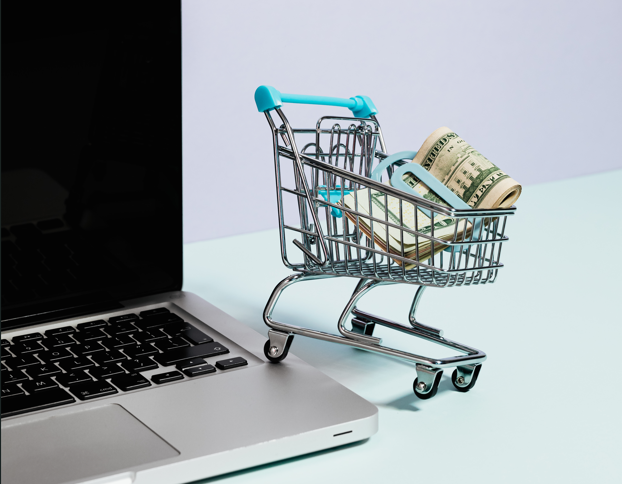

##**Attribute description :**

• Invoice Number: A unique identification number assigned to each transaction, consisting of 6 digits. If the number starts with the letter 'c', it means the transaction has been cancelled.

• Stock Code: A unique identification number assigned to each distinct product, consisting of 5 digits.

• Description: The name of the product.

• Quantity: The amount of each product purchased in a single transaction.

• Invoice Date: The date and time when the transaction was made.

• Unit Price: The cost per unit of the product, in sterling.

• Customer ID: A unique identification number assigned to each customer, consisting of 5 digits.

• Country: The country of residence for each customer.





In [ ]:
# Importing necessary libraries for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import missingno as msno

# Importing necessary libraries for time-related operations
import time
import datetime as dt
from datetime import datetime, timedelta

# Importing necessary libraries for predictive modeling
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Ignoring warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load dataset

from google.colab import drive
drive.mount('/content/drive')

df_original = pd.read_excel('/content/drive/MyDrive/Project/Project 4/Online Retail.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Copying data to preserve orignal file

df = df_original.copy()

In [ ]:
# Checking Head

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Dataset Rows & Columns count

df.shape

(541909, 8)

In [ ]:
# Checking info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Describing the data

df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Dataset Duplicate Value Count

df.duplicated().sum()

5268

In [ ]:
# Missing Values/Null Values Count

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<AxesSubplot:>

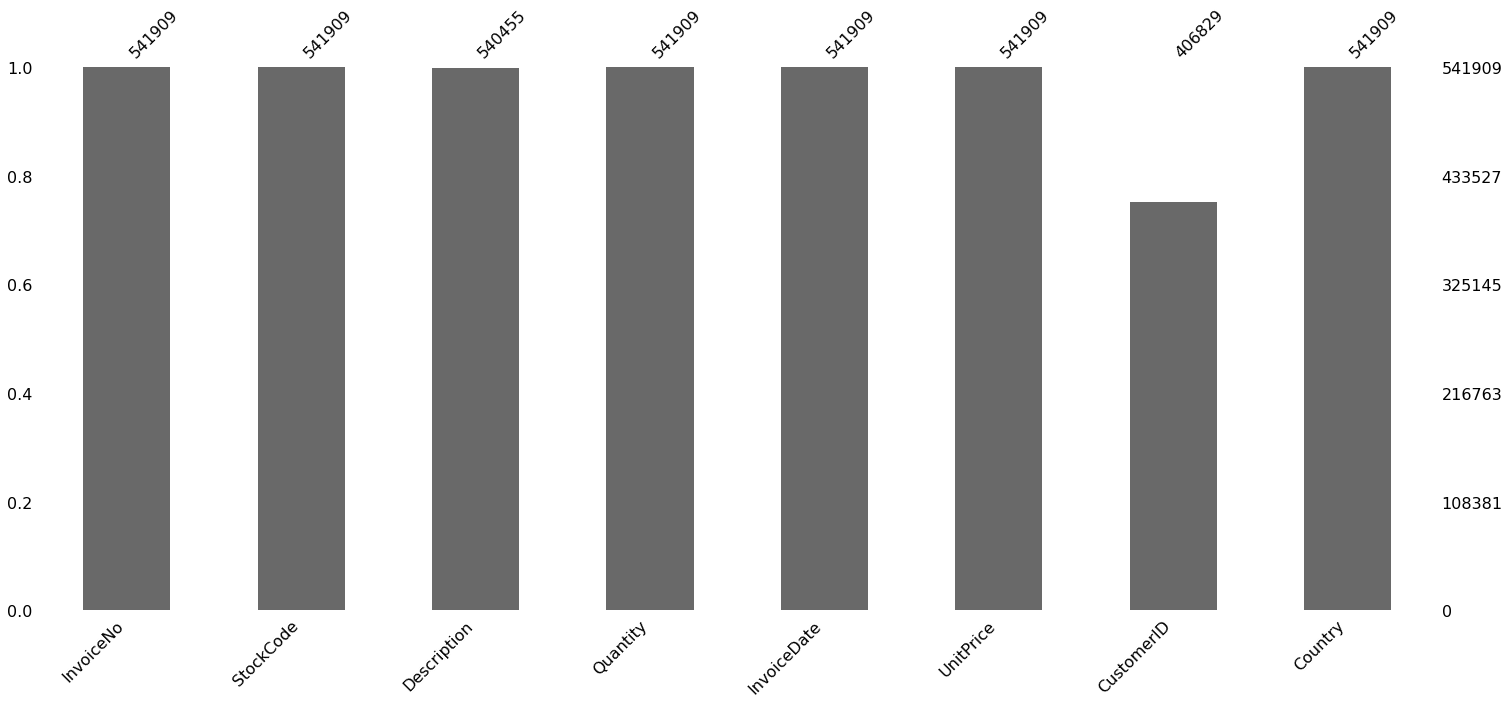

In [ ]:
# Visualizing the missing values

msno.bar(df)

In [ ]:
# Checking unique values

df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

##**Data Cleaning**

In [ ]:
# Create a  new column Amount

df['Amount'] = df.Quantity * df.UnitPrice

In [ ]:
# Dataset Columns

df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Amount'],
      dtype='object')

In [ ]:
df.shape

(541909, 9)

In [ ]:
# Drop duplicate rows

df = df.drop_duplicates()
print(df.shape)

(536641, 9)


In [ ]:
# Group data by country and calculate percentage of customer IDs and amount

df_grouped = df.groupby(['Country']).agg({'CustomerID': 'count', 'Amount': 'sum'})
df_grouped['CustomerID_pct'] = df_grouped['CustomerID'] / df_grouped['CustomerID'].sum() * 100
df_grouped['Amount_pct'] = df_grouped['Amount'] / df_grouped['Amount'].sum() * 100

Text(0.5, 1.0, 'Amount Percentage per Country')

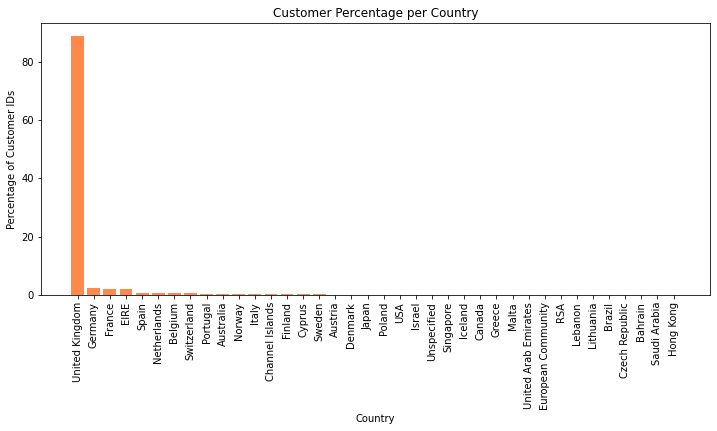

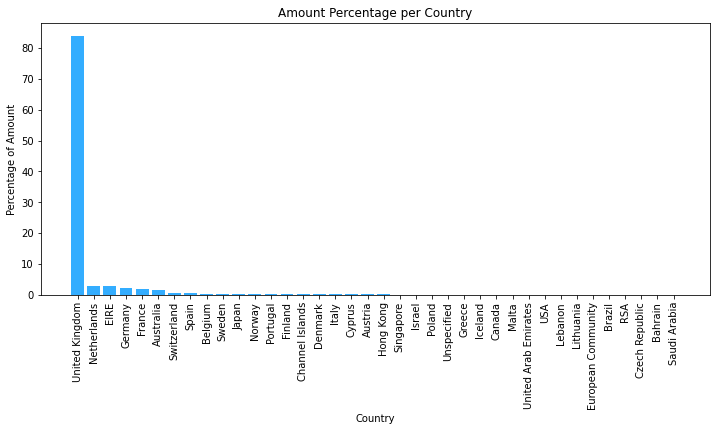

In [ ]:
# Sort dataframe by percentage of customer IDs in descending order
df_grouped = df_grouped.sort_values('CustomerID_pct', ascending=False)

# create first chart - customer percentage per country

plt.figure(figsize=(12,5))
plt.bar(df_grouped.index, df_grouped['CustomerID_pct'], color='#ff884d')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Percentage of Customer IDs')
plt.title('Customer Percentage per Country')

# Sort dataframe by percentage of customer IDs in descending order
df_grouped = df_grouped.sort_values('Amount_pct', ascending=False)

# Create second chart - amount percentage per country

plt.figure(figsize=(12,5))
plt.bar(df_grouped.index, df_grouped['Amount_pct'], color='#33adff')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Percentage of Amount')
plt.title('Amount Percentage per Country')

####**Observation**

* The country with the highest sales revenue and the most customers is the United Kingdom. For the purpose of this analysis, I will be focusing on data from orders placed in the United Kingdom.

In [ ]:
# Select only the country United Kingdom

df = df[df.Country == 'United Kingdom']
df.shape

(490300, 9)

In [ ]:
# Remove Returned orders

df = df[df['Amount'] >= 0]
df.shape

(482477, 9)

In [ ]:
# Remove canceled orders

df = df[df['Quantity'] > 0]
df.shape

(481141, 9)

In [ ]:
# Remove rows where unit price is less than equal to zero

df = df[df["UnitPrice"] > 0]
df.shape

(479985, 9)

In [ ]:
# Handling null values in column customerID

print(np.sum(df.isnull()), "\n")
print("Percentage of customers missing: ", round(df['CustomerID'].isnull().sum() * 100 / len(df),2),"%" )

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     130782
Country             0
Amount              0
dtype: int64 

Percentage of customers missing:  27.25 %


In [ ]:
null_id_invoices = df[df.CustomerID.isnull()]["InvoiceNo"].drop_duplicates().tolist()
print("Invoices count with Null Customer ID", len(null_id_invoices))

Invoices count with Null Customer ID 1373


In [ ]:
df.groupby(['InvoiceNo'])['CustomerID'] \
                             .nunique() \
                             .reset_index(name='nunique') \
                             .sort_values(['nunique'], ascending=False) \
                             .sum()

nunique    16646
dtype: int64

In [ ]:
# Create new column NewID

df['NewID'] = df['CustomerID']
df.loc[df['CustomerID'].isnull(), ['NewID']] = df['InvoiceNo']

# Remove all non digits from column NewID (Since Invoice can contains "C" referring to cancellations)

df['NewID'] = df['NewID'].astype(str).str.replace('\D+', '')

# Convert to integer

df['NewID'] = pd.to_numeric(df['NewID'])

# Check if presnt customerIds and New Ids have any common values since it would create alter actual Customer Insights

customer = df['CustomerID'].nunique()
null_invoices = df[df.CustomerID.isnull()]['InvoiceNo'].nunique()
new_ids = df['NewID'].nunique()
print("Number of Customers:", customer)
print("Number of Orders where CustomerID in Null:", null_invoices)
print("Number of Customers + Number of Orders where CustomerID in Null:", customer + null_invoices)
print("Number of New ID's:", new_ids)

Number of Customers: 3920
Number of Orders where CustomerID in Null: 1373
Number of Customers + Number of Orders where CustomerID in Null: 5293
Number of New ID's: 5293


Since both values are equal, it can be inferred that each order lacking a customer ID was assigned a unique "NewID" and that no duplicates were formed.

In [ ]:
df.nunique()

InvoiceNo      18019
StockCode       3916
Description     4007
Quantity         369
InvoiceDate    16798
UnitPrice       1246
CustomerID      3920
Country            1
Amount          4757
NewID           5293
dtype: int64

#**RFM Segmentation**

We generated a column named "NewID" to handle null values in the "CustomerID" column. However, we remove rows with null "CustomerID" values because they can skew the results of the analysis, especially the calculation of frequency. We are now proceeding to aggregate the remaining data and compute the "recency," "frequency," and "monetary value" columns for each "CustomerID".

In [ ]:
# Drop the rows with null values in the "CustomerID" column

df = df[df['CustomerID'].notnull()]

In [ ]:
df.shape

(349203, 10)

###**Recency**

In [ ]:
# Last date available in our dataset

df['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [ ]:
# Select one year of data for more focused analysis

df = df[df['InvoiceDate'].between('2010-12-09 12:49:00', '2011-12-09 12:49:00')]

In [ ]:
# Create a new column 'Date' that includes only the date portion of the InvoiceDate
df['Date'] = df['InvoiceDate'].dt.date
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,NewID,Date
20206,538014,22969,HOMEMADE JAM SCENTED CANDLES,12,2010-12-09 12:49:00,1.45,14440.0,United Kingdom,17.4,144400,2010-12-09
20207,538014,72802B,OCEAN SCENT CANDLE IN JEWELLED BOX,12,2010-12-09 12:49:00,4.25,14440.0,United Kingdom,51.0,144400,2010-12-09
20208,538014,85066,CREAM SWEETHEART MINI CHEST,12,2010-12-09 12:49:00,12.75,14440.0,United Kingdom,153.0,144400,2010-12-09
20209,538014,82483,WOOD 2 DRAWER CABINET WHITE FINISH,6,2010-12-09 12:49:00,5.95,14440.0,United Kingdom,35.7,144400,2010-12-09
20210,538014,82486,WOOD S/3 CABINET ANT WHITE FINISH,6,2010-12-09 12:49:00,7.95,14440.0,United Kingdom,47.7,144400,2010-12-09


In [ ]:
# Define the reference date

reference_date= dt.date(2011,12,9)

# Group by customers and check last date of purshace

recency_df = df.groupby(by='CustomerID', as_index=False)['Date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']

# Calculate the recency for each customer

recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (reference_date - x).days)
recency_df.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


In [ ]:
# Drop LastPurchaseDate

recency_df.drop('LastPurchaseDate', axis=1, inplace=True)

###**Frequency**

In [ ]:
# Drop duplicates

df_copy = df
df_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)

# Calculate frequency of purchases

frequency_df = df.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,10
2,12748.0,194
3,12749.0,5
4,12820.0,4


###**Monetary Value**

In [ ]:
# Calculate Monetary value

monetary_df = df.groupby(by=['CustomerID'], as_index=False)['Amount'].sum()
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,658.89
2,12748.0,3696.73
3,12749.0,98.35
4,12820.0,58.20


###**Create RMF Table**

In [ ]:
# Merge recency dataframe with frequency dataframe

RF_df = recency_df.merge(frequency_df,on='CustomerID')
RF_df.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12747.0,2,10
2,12748.0,0,194
3,12749.0,3,5
4,12820.0,3,4


In [ ]:
# Merge RF dataframe with monetary dataframe

rfm_df = RF_df.merge(monetary_df,on='CustomerID')

# Use CustomerID as index

rfm_df.set_index('CustomerID',inplace=True)
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,10,658.89
12748.0,0,194,3696.73
12749.0,3,5,98.35
12820.0,3,4,58.20


###**RFM Table Correctness verification**

In [ ]:
df[df['CustomerID']==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,NewID,Date
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,123460,2011-01-18


In [ ]:
(reference_date - dt.date(2011,1,18)).days

325

##**Top Customers**

In [ ]:
# Create a new column Rank

customer_rank = rfm_df.copy()
customer_rank['Rank'] = rfm_df['Monetary'].rank(ascending=0)
customer_rank.head()

,Recency,Frequency,Monetary,Rank
CustomerID,,,,
12346.0,325,1,77183.60,2.0
12747.0,2,10,658.89,182.0
12748.0,0,194,3696.73,34.0
12749.0,3,5,98.35,1139.0
12820.0,3,4,58.20,1664.5


In [ ]:
# Top Customers

customer_rank.sort_values('Rank',ascending=True)

,Recency,Frequency,Monetary,Rank
CustomerID,,,,
16446.0,0,2,168471.25,1.0
12346.0,325,1,77183.60,2.0
15098.0,182,3,39916.50,3.0
18102.0,0,57,39646.45,4.0
17949.0,1,44,28685.69,5.0
...,...,...,...,...
14041.0,266,1,0.58,3855.0
15645.0,18,1,0.42,3856.5
15503.0,362,1,0.42,3856.5


In [ ]:
# Calculate quantiles

quantiles = rfm_df.quantile(q=[0.25,0.50,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,1.0,17.400
0.50,49.0,2.0,45.000
0.75,133.5,5.0,121.505


In [ ]:
# create a function to assign quantile scores

def assign_quantile(value, feature):
    if value <= quantiles[feature][0.25]:
        return 1
    elif value <= quantiles[feature][0.50]:
        return 2
    elif value <= quantiles[feature][0.75]:
        return 3
    else:
        return 4

# create new columns for quartile scores

rfm_df['R_Quantile'] = rfm_df['Recency'].apply(assign_quantile, args=('Recency',))
rfm_df['F_Quantile'] = rfm_df['Frequency'].apply(assign_quantile, args=('Frequency',))
rfm_df['M_Quantile'] = rfm_df['Monetary'].apply(assign_quantile, args=('Monetary',))

# create RFMScore column

rfm_df['RFMScore'] = rfm_df['R_Quantile'].map(str) + rfm_df['F_Quantile'].map(str) + rfm_df['M_Quantile'].map(str)
rfm_df

,Recency,Frequency,Monetary,R_Quantile,F_Quantile,M_Quantile,RFMScore
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,1,4,414
12747.0,2,10,658.89,1,4,4,144
12748.0,0,194,3696.73,1,4,4,144
12749.0,3,5,98.35,1,3,3,133
12820.0,3,4,58.20,1,3,3,133
...,...,...,...,...,...,...,...
18280.0,277,1,23.70,4,1,2,412
18281.0,180,1,5.04,4,1,1,411
18282.0,7,2,38.25,1,2,2,122


In [ ]:
# Customer Segmentation

print("Best Customers: ",len(rfm_df[rfm_df['RFMScore']=='144']))
print('Loyal Customers: ',len(rfm_df[rfm_df['F_Quantile']==4]))
print("Big Spenders: ",len(rfm_df[rfm_df['M_Quantile']==4]))
print('Almost Lost: ', len(rfm_df[rfm_df['RFMScore']=='344']))
print('Lost Customers: ',len(rfm_df[rfm_df['RFMScore']=='444']))
print('Lost Cheap Customers: ',len(rfm_df[rfm_df['RFMScore']=='411']))

Best Customers:  356
Loyal Customers:  752
Big Spenders:  965
Almost Lost:  64
Lost Customers:  10
Lost Cheap Customers:  352


#**K-Means Clustering**

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

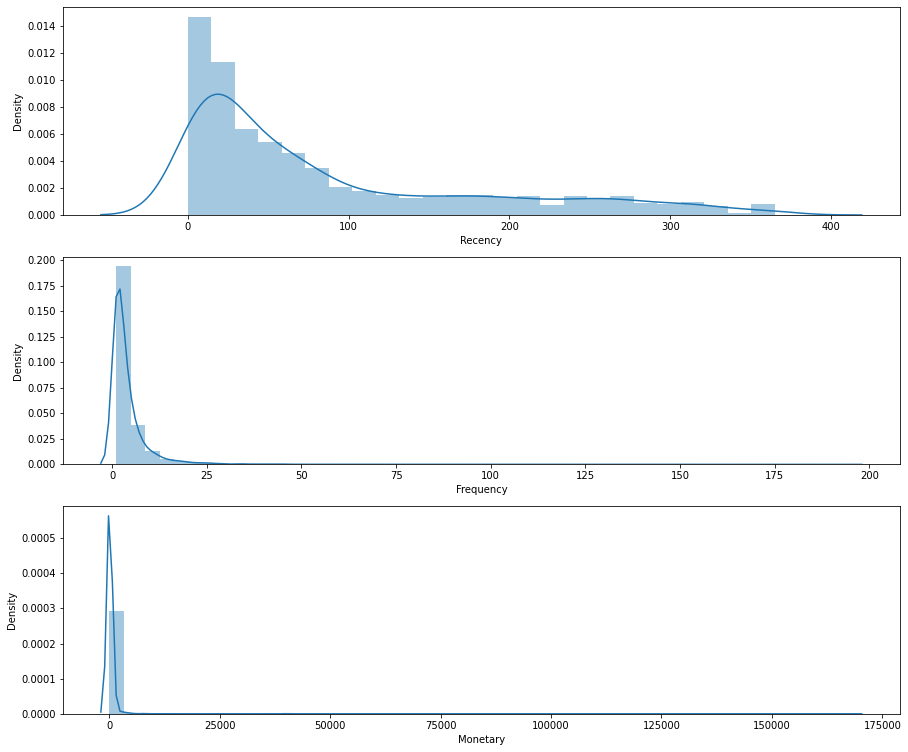

In [ ]:
# Checking distribution of Recency, Frequency and Monetary value

plt.figure(figsize=(15,13))

# Plot distribution of var1
plt.subplot(3, 1, 1)
sns.distplot(rfm_df['Recency'])

# Plot distribution of Frequency
plt.subplot(3, 1, 2)
sns.distplot(rfm_df['Frequency'])

# Plot distribution of Monetary
plt.subplot(3, 1, 3)
sns.distplot(rfm_df['Monetary'])

####**Observation**

Since clustering algorithms require a normal distribution and the data is right-skewed, we will normalize the data by applying log transformation of all the variables to handle the skewness.

In [ ]:
# Apply log-transformation to the Recency, Frequency, and Monetary value columns

rfm_df[['log_R','log_F','log_M']] = np.sqrt(rfm_df[['Recency','Frequency','Monetary']])

<AxesSubplot:xlabel='log_M', ylabel='Density'>

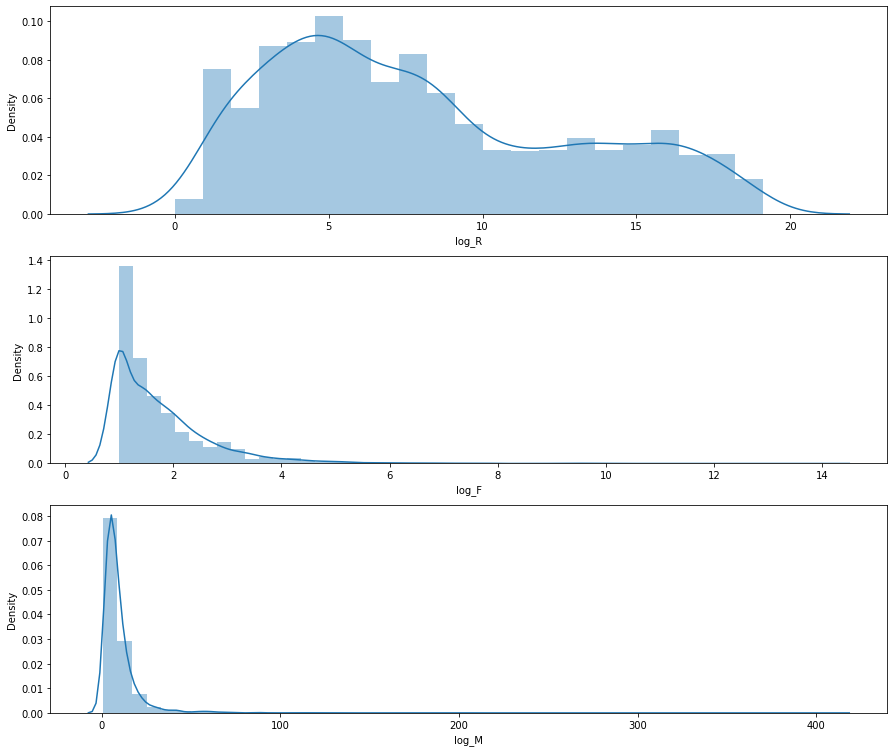

In [ ]:
# Checking the distribution of Recency, Frequency and Monetary variables after log transformation

plt.figure(figsize=(15,13))
plt.subplot(3, 1, 1)
sns.distplot(rfm_df['log_R'])
plt.subplot(3, 1, 2)
sns.distplot(rfm_df['log_F'])
plt.subplot(3, 1, 3)
sns.distplot(rfm_df['log_M'])

####**Observation**

After applying log transformation of all the variables, we observe an almost normal distribution.

In [ ]:
# Features Used in training K Means - square root of Recency, Frequency and Monetary values

data_norm = rfm_df[['log_R','log_F','log_M']]

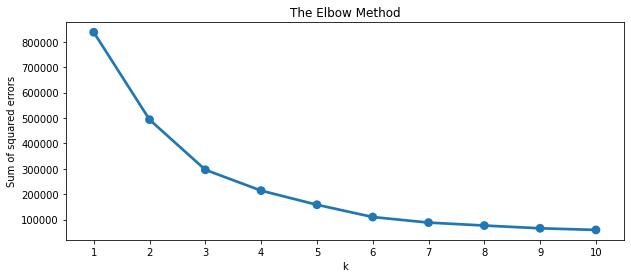

In [ ]:
sse = {}

# Fit KMeans and calculate SSE for each k
for k in range(1, 11):

    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)

    # Fit KMeans on the normalized dataset
    kmeans.fit(data_norm)

    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

# Plotting the elbow chart

plt.figure(figsize=(10,4))
plt.title('The Elbow Method')
plt.xlabel('k');
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

Based on the above plot, the optimal number of clusters can be determined as 3.

In [ ]:
SS# Initialize the KMeans model with 3 clusters

kmeans = KMeans(n_clusters=3, random_state=1)

# Fit the KMeans model on the normalized data

kmeans.fit(data_norm)

KMeans(n_clusters=3, random_state=1)

In [ ]:
# Predict the cluster labels for each data point

rfm_df['clusters'] = kmeans.predict(data_norm)

In [ ]:
rfm_df.groupby(['clusters'])[['Recency','Frequency', 'Monetary']].mean()

,Recency,Frequency,Monetary
clusters,,,
0,28.750000,17.937500,1915.772837
1,69.625000,32.000000,52554.270000
2,90.724952,3.293439,80.473212


<AxesSubplot:>

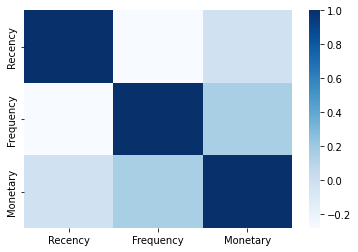

In [ ]:
# Check correlation

sns.heatmap(rfm_df[['Recency','Frequency', 'Monetary']].corr(), cmap='Blues')

In [ ]:
# Get the cluster centroids

centroids = kmeans.cluster_centers_

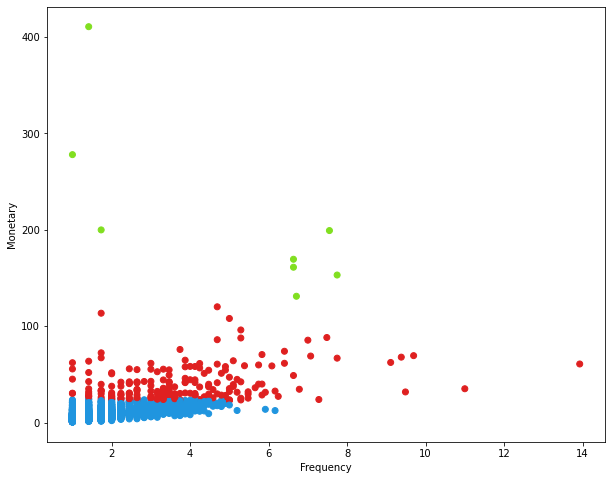

In [ ]:
# Define colors for the clusters

colors = ['#DF2020', '#81DF20', '#2095DF']
cluster_map = ListedColormap(colors)

# Create a scatter plot of the normalized data points colored by their cluster assignment

plt.figure(figsize=(10,8))
plt.scatter(rfm_df['log_F'], rfm_df['log_M'], c=rfm_df['clusters'], cmap=cluster_map)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

In [ ]:
# Compute the Silhouette Coefficient

labels = kmeans.labels_
silhouette_coef = silhouette_score(data_norm, labels, metric='euclidean')
print(silhouette_coef)

0.7150938442870572


##**K-Means Clustering**

####**1. GREEN CLUSTER :** High-value customers are those who have made transactions with high frequency and high **monetary** value.


####**2. RED CLUSTER :**  Average-value customers are those who have made moderate transactions with an average monetary value. These customers may be at risk of becoming lost customers, thus it is recommended to market aggressively towards them with attractive deals to retain them.


####**3. BLUE CLUSTER :** Low-value or "lost" customers are those who have made infrequent and low-monetary transactions long ago. These customers may have dropped off from the customer base.

#**Hierarchical clustering**

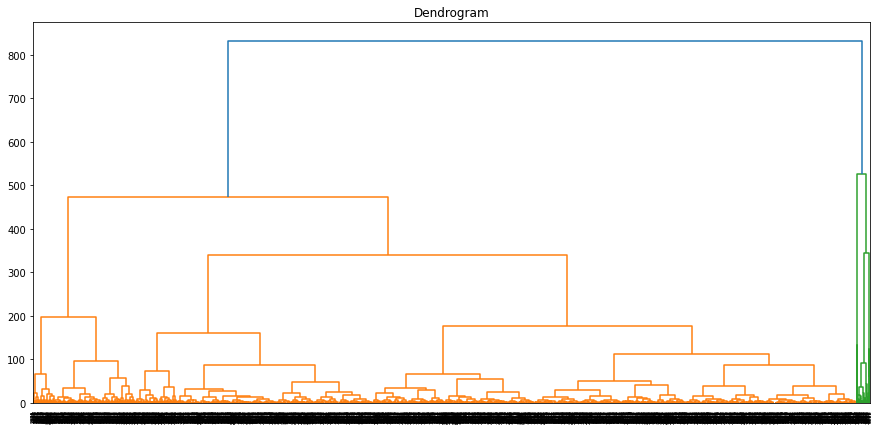

In [ ]:
# Perform hierarchical clustering using linkage and dendrogram

Z = linkage(data_norm, method='ward')
plt.figure(figsize=(15, 7))
plt.title("Dendrogram")
dendrogram(Z)
plt.show()

In [ ]:
#Initialize the KMeans model with 3 clusters
n_clusters = 3

# Create a hierarchical clustering model
model = AgglomerativeClustering(n_clusters=n_clusters)

# Predict the cluster labels for each data point
rfm_df['Hclusters'] = model.fit_predict(data_norm)

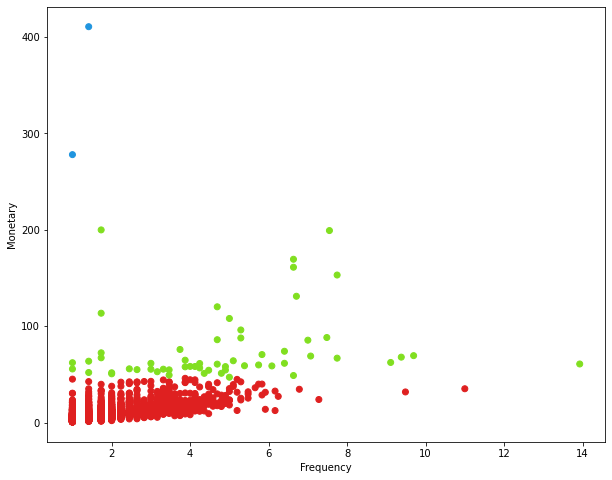

In [ ]:
# Define colors for the clusters

colors = ['#DF2020', '#81DF20', '#2095DF']
cluster_map = ListedColormap(colors)

# Create a scatter plot of the normalized data points colored by their cluster assignment

plt.figure(figsize=(10,8))
plt.scatter(rfm_df['log_F'], rfm_df['log_M'], c=rfm_df['Hclusters'], cmap=cluster_map)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

In [ ]:
# Compute the Silhouette Coefficient

labels = model.labels_
silhouette_coef = silhouette_score(data_norm, labels, metric='euclidean')
print(silhouette_coef)

0.8424767886032591


##**Agglomerative Clustering**

####**1. BLUE CLUSTER :** High-value customers are those who have made transactions with high frequency and high **monetary** value.


####**2. GREEN CLUSTER :**  Average-value customers are those who have made moderate transactions with an average monetary value. These customers may be at risk of becoming lost customers, thus it is recommended to market aggressively towards them with attractive deals to retain them.


####**3. RED CLUSTER :** Low-value or "lost" customers are those who have made infrequent and low-monetary transactions long ago. These customers may have dropped off from the customer base.

#**Conclusion**

###**We have selected Agglomerative Clustering as our final model based on its higher silhouette score compared to K-Means clustering. Through our analysis, we have identified the green cluster as the largest cluster, representing customers with both high frequency and high monetary value. Therefore, this group holds the most importance within the dataset.**

###**To maintain a strong customer base, it is highly recommended to implement aggressive marketing strategies targeting the average value customers. By offering attractive deals and personalized offers, we can ensure their loyalty as they constitute the majority of our customer base. Losing them could have a significant negative impact on the overall business performance.**

###**However, it is equally crucial not to overlook the low value customers. Though they may contribute less to the company's revenue individually, their collective impact should not be underestimated. By implementing strategies to enhance their experience and encourage repeat purchases, we can still benefit from their contributions.**

###**Moreover, retaining high value customers should be a top priority. These customers bring in a substantial portion of the company's revenue, and their continued loyalty is essential. Providing exceptional customer service, personalized rewards, and exclusive offers can help maintain their satisfaction and encourage them to remain loyal to the brand.**

###**In summary, by focusing on aggressive marketing towards average value customers, not neglecting low value customers, and prioritizing the retention of high value customers, the business can maximize its revenue and ensure long-term success.**